# Brief introduction to Python, ipython notebook, numpy and matplotlib

In [1]:
a = "Hello World"
print(a)

Hello World


In [2]:
a = a + "!"
a

'Hello World!'

In [3]:
b = [1, 2, 3, 5, 7]
len(b)

5

In [4]:
b[2]

3

In [5]:
for x in b:
    print(x)

1
2
3
5
7


## OS

In [6]:
import os

In [7]:
os.listdir()

['ipython-intro.ipynb',
 'data',
 '1_tasks.md',
 'readdy-intro-1-particles-diffusion-potentials.ipynb',
 'readdy-intro-2-reactions-observables-checkpoints.ipynb',
 '.ipynb_checkpoints',
 'checkpoints',
 'crowded_rdf.ipynb',
 'crowded_msd.ipynb']

In [8]:
data_dir = "data/"

In [9]:
os.path.exists(data_dir)

True

In [10]:
if not os.path.exists(data_dir):
    os.mkdir(data_dir)
os.path.exists(data_dir)

True

## Pickle

In [11]:
import pickle

### Save a dictionary to pickle file

In [12]:
data = {"x": 0, "name": "Heinrich"}
data

{'x': 0, 'name': 'Heinrich'}

In [13]:
file_name = "heinrich.pkl"
file_path = os.path.join(data_dir, file_name)
file_path

'data/heinrich.pkl'

In [14]:
with open(file_path, "wb") as f:
    pickle.dump(data, f, protocol=pickle.HIGHEST_PROTOCOL)

In [15]:
os.listdir(data_dir)

['heinrich.pkl']

### Load a pickle file

In [16]:
with open(file_path, "rb") as f:
    loaded_data = pickle.load(f)
loaded_data

{'x': 0, 'name': 'Heinrich'}

In [17]:
data == loaded_data

True

## Numpy

In [18]:
import numpy as np

### 1d arrays - "vectors"

In [19]:
x = np.array([1., 2., 3.])
x

array([1., 2., 3.])

In [20]:
x.shape

(3,)

In [21]:
len(x)

3

In [22]:
x + 1.

array([2., 3., 4.])

In [23]:
x * 2.

array([2., 4., 6.])

### 2d arrays - "matrices"

In [24]:
A = np.array([[1., 2., 3.],[4., 5., 6.],[7., 8., 9.], [10., 11., 12.]])
A

array([[ 1.,  2.,  3.],
       [ 4.,  5.,  6.],
       [ 7.,  8.,  9.],
       [10., 11., 12.]])

In [25]:
A.shape

(4, 3)

### Broadcasting matches indices in reverse order
see [numpy documentation](https://docs.scipy.org/doc/numpy/user/basics.broadcasting.html#general-broadcasting-rules) on this topic

In [26]:
B = A - x
B

array([[0., 0., 0.],
       [3., 3., 3.],
       [6., 6., 6.],
       [9., 9., 9.]])

i.e. `B[i,:] = A[i,:] - x[:]`

### (Pseudo) Random numbers

In [27]:
y = np.random.normal(size=(10,3))
y

array([[-1.30921078,  0.14458015, -1.19316452],
       [ 1.10370193,  0.24503009, -0.53613256],
       [ 1.03558037, -0.24109983, -0.11852201],
       [-0.4759072 , -0.70585427, -1.18869971],
       [ 0.65043454, -2.50609359,  1.28805148],
       [ 0.22360297,  0.30730445,  0.836418  ],
       [-0.03356733,  0.86904705,  1.31156586],
       [-1.03325485,  0.21848324, -0.92913394],
       [-0.15354613,  0.24285747,  0.09495475],
       [-1.24409693, -0.19421431,  2.03388963]])

In [28]:
z = np.random.uniform(size=(10,3)) * 4. - 2.
z

array([[ 0.10645792,  0.52523236, -0.65257539],
       [ 0.12876491,  0.81621895,  0.7454878 ],
       [ 0.98047276, -0.97340752,  0.59817045],
       [ 1.16445088, -0.26141368,  0.05938716],
       [-1.34573854,  0.08786264, -0.40698826],
       [ 1.68103673,  0.23460096,  1.98402787],
       [-0.59716901,  0.03808944,  1.48299886],
       [-0.83158796,  1.77960569, -0.25669274],
       [ 0.05868619, -0.88323417, -1.93962064],
       [-0.36871751,  0.4709239 , -1.74209691]])

In [29]:
z > -2.

array([[ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True]])

In [30]:
z < 2.

array([[ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True]])

In [31]:
np.alltrue(np.logical_and(z > -2., z < 2.))

True

### Mean, standard deviation, and standard error

In [32]:
np.mean(y)

-0.041899866564171634

In [33]:
np.std(y)

0.9561997874642264

Standard error only sensible if elements are [i.i.d.](https://en.wikipedia.org/wiki/Independent_and_identically_distributed_random_variables) - independent and identically distributed , i.e. they are uncorrelated and are sampled from the same distribution

In [34]:
np.std(y) / np.sqrt(np.size(y))

0.17457739769193412

Can also be calculated per axis, e.g. first index is time, and second index is id of redundant measurement

In [35]:
a = np.random.uniform(size=(3,8))
a[1] += 1.
a[2] += 2.5
a

array([[0.2824064 , 0.45615027, 0.52312578, 0.91719623, 0.23135871,
        0.50832473, 0.44688612, 0.45374989],
       [1.92228444, 1.39073331, 1.26735894, 1.32319415, 1.95946695,
        1.87633578, 1.76413917, 1.77210487],
       [3.2094888 , 2.8782394 , 3.35086374, 2.52140513, 3.1783895 ,
        3.42001939, 2.5804751 , 2.56800821]])

In [36]:
np.mean(a, axis=1) # average out the redundant measurements in second index

array([0.47739977, 1.6594522 , 2.96336116])

In [37]:
np.std(a, axis=1)

array([0.19266834, 0.26664456, 0.34838691])

## Matplotlib

In [38]:
import matplotlib.pyplot as plt

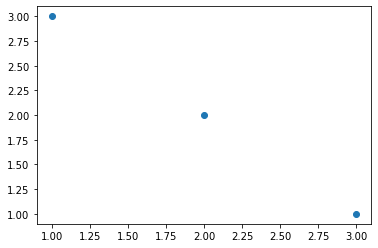

In [41]:
plt.plot([1,2,3], [3,2,1], "o")

(array([  8.,  21.,  84., 165., 232., 246., 148.,  63.,  22.,  11.]),
 array([-3.04934286, -2.42277843, -1.79621399, -1.16964956, -0.54308512,
         0.08347931,  0.71004375,  1.33660818,  1.96317261,  2.58973705,
         3.21630148]),
 <a list of 10 Patch objects>)

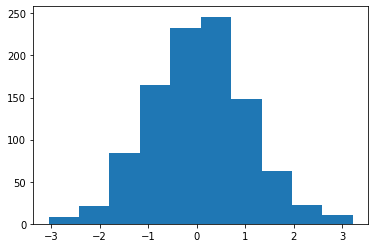

In [101]:
xs = np.random.normal(size=(1000))
ys = np.random.normal(size=(1000))
plt.hist(xs)

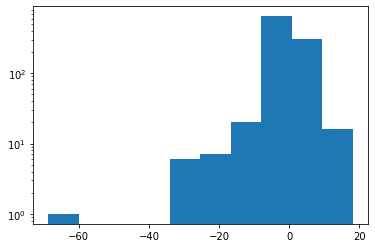

In [102]:
fancy_transformation = 2. * xs * xs - 2. * xs**2 * ys **2
plt.hist(fancy_transformation)
plt.yscale("log")

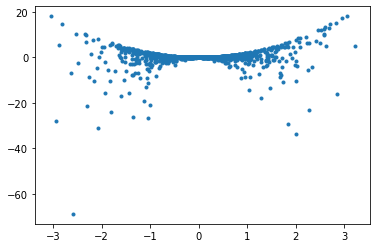

In [103]:
plt.scatter(xs, 2. * xs * xs - 2. * xs**2 * ys **2, marker=".")

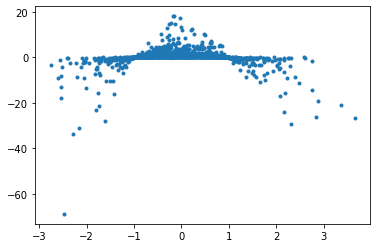

In [104]:
plt.scatter(ys, 2. * xs * xs - 2. * xs**2 * ys **2, marker=".")

Text(0.5, 0, 'Z Label')

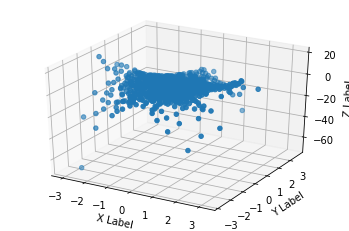

In [106]:
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

import matplotlib.pyplot as plt
import numpy as np


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(xs, ys, fancy_transformation)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')